In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# loading the datasets
from google.colab import files
import pandas as pd

uploaded = files.upload()

customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')

data = pd.merge(customers, transactions, on='CustomerID', how='inner')

Saving Customers.csv to Customers.csv
Saving Transactions.csv to Transactions.csv


In [11]:
print(data.columns)

Index(['CustomerName', 'Region', 'SignupDate', 'TransactionID', 'ProductID',
       'TransactionDate', 'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [14]:
# preprocessingg the data

# select only numeric columns for filling missing values
numeric_data = data.select_dtypes(include=np.number)
numeric_data.fillna(numeric_data.mean(), inplace=True)

data[numeric_data.columns] = numeric_data

# standardizing the data for clustring
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=np.number))
#making sure to only scale numeric values

In [15]:
# performing clustering

cluster_results = {}
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_scaled)

    # calculating clustering metrics
    db_index = davies_bouldin_score(data_scaled, labels)
    silhouette_avg = silhouette_score(data_scaled, labels)

    cluster_results[n_clusters] = {
        'model': kmeans,
        'labels': labels,
        'db_index': db_index,
        'silhouette_score': silhouette_avg
    }

In [16]:
# finding the best number of clusters based on DB Index
best_n_clusters = min(cluster_results, key=lambda x: cluster_results[x]['db_index'])
best_model = cluster_results[best_n_clusters]['model']
best_labels = cluster_results[best_n_clusters]['labels']
best_db_index = cluster_results[best_n_clusters]['db_index']

In [17]:
data['Cluster'] = best_labels

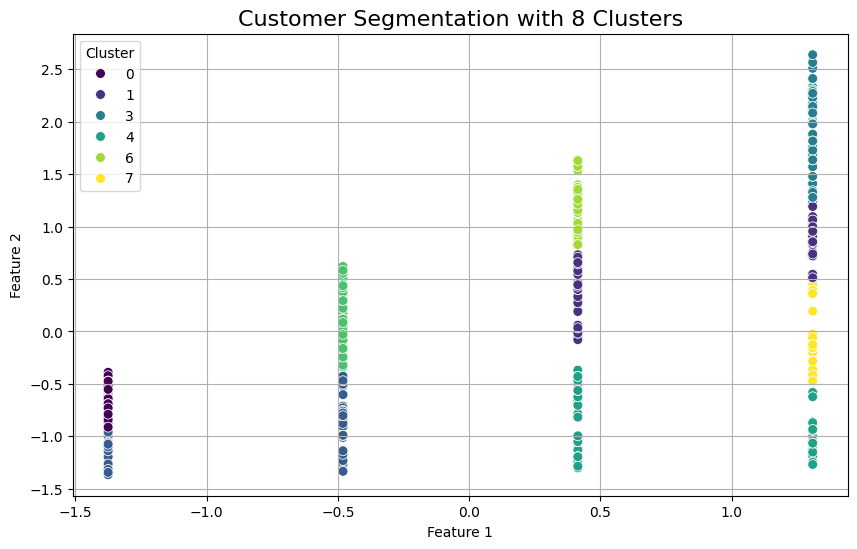

In [18]:
# visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_scaled[:, 0], y=data_scaled[:, 1], hue=data['Cluster'], palette='viridis', s=50
)
plt.title(f'Customer Segmentation with {best_n_clusters} Clusters', fontsize=16)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [19]:
print(f"Best Number of Clusters: {best_n_clusters}")
print(f"Davies-Bouldin Index: {best_db_index:.4f}")
for n_clusters, metrics in cluster_results.items():
    print(f"\nClusters: {n_clusters}")
    print(f"  DB Index: {metrics['db_index']:.4f}")
    print(f"  Silhouette Score: {metrics['silhouette_score']:.4f}")

Best Number of Clusters: 8
Davies-Bouldin Index: 0.7271

Clusters: 2
  DB Index: 0.9442
  Silhouette Score: 0.4180

Clusters: 3
  DB Index: 0.8497
  Silhouette Score: 0.4225

Clusters: 4
  DB Index: 0.8147
  Silhouette Score: 0.4348

Clusters: 5
  DB Index: 0.7911
  Silhouette Score: 0.4529

Clusters: 6
  DB Index: 0.7967
  Silhouette Score: 0.4812

Clusters: 7
  DB Index: 0.7344
  Silhouette Score: 0.4868

Clusters: 8
  DB Index: 0.7271
  Silhouette Score: 0.4877

Clusters: 9
  DB Index: 0.7522
  Silhouette Score: 0.4957

Clusters: 10
  DB Index: 0.7574
  Silhouette Score: 0.5223
